# FE Stats Character Analysis

### A notebook to showcase the distributions of stat lines for the following characters
- #### ***Marth***
- #### ***Linde***
- #### ***Palla***
- #### ***Alm***
- #### ***Roy***
- #### ***Lilina***
- #### ***Claude***
- #### ***Lysithea***

### For each character, the following considerations are applied regarding data collection
- #### *Analysis based on comparison with character with most amount of appearances (provided stats are comparable) and stat disribution (in %) after normalizing data and averaging*
- #### *Use base stats from joining time*
- #### *Include DLC and other means outside of strict base game availability*
- #### *No spin-offs (except FEH)*
- #### *Do not include seasonal FEH alts*

### The analysis aims find out how the average stat line describes the character's key attributes based on an interpretation of what each individual stat means and how it is measured. Then it will be utilized to see if there is parity between the in-game descriptions and lore of the character and the stats they are attributed as a player unit.

### **Analysis**

In [1]:
import sys, os

sys.path.append(os.path.abspath(os.path.join('..', 'src\\Analysis')))
sys.path.append(os.path.abspath(os.path.join('..', 'src\\Singleton')))

import torch
from CharacterStatsAnalysis import CharacterStatsAnalysis


#### What Does Each Stat Mean?

- Some text (i want to code first)

#### Marth Stat Line Breakdown

In [2]:
marth_index_labels = ["FE1","FE3","FE11","FE12","FE13 (Prince)","FE13 (King)","FE14","FE15","FEH (Base)","FEH (Legend)","FEH (Youth)","FEH (Brave)","FEH (Plot Ghost)"]
marth_stats_analysis = CharacterStatsAnalysis("cuda:0", "Marth", marth_index_labels)
marth_stats_analysis.filter_dataframe()

marth_stats_analysis.filtered_stats_dataframe


,hp,atk,skl,spd,lck,def,res
FE1,18,5,3,7,7,7,0
FE3,22,6,8,9,8,7,0
FE11,18,5,3,7,7,7,0
FE12,26,8,10,10,9,8,0
FE13 (Prince),68,31,35,34,39,24,15
FE13 (King),77,38,40,41,40,31,20
FE14,29,15,23,22,24,15,10
FE15,32,15,16,15,12,10,6
FEH (Base),19,7,-99,8,-99,7,6
FEH (Legend),18,8,-99,10,-99,8,4


- A couple things to take note of:
    - Some joining stat lines vary more than the rest due to Marth's availablility through DLC and other means, which often are adjusted to late-game standards
    - Sentinal values are used only in the FEH stat lines since that game doesn't have Skl or Lck stats

- ***Normalization***

In [30]:
marth_stats_analysis.normalize_stats()


- ***Visualizations***

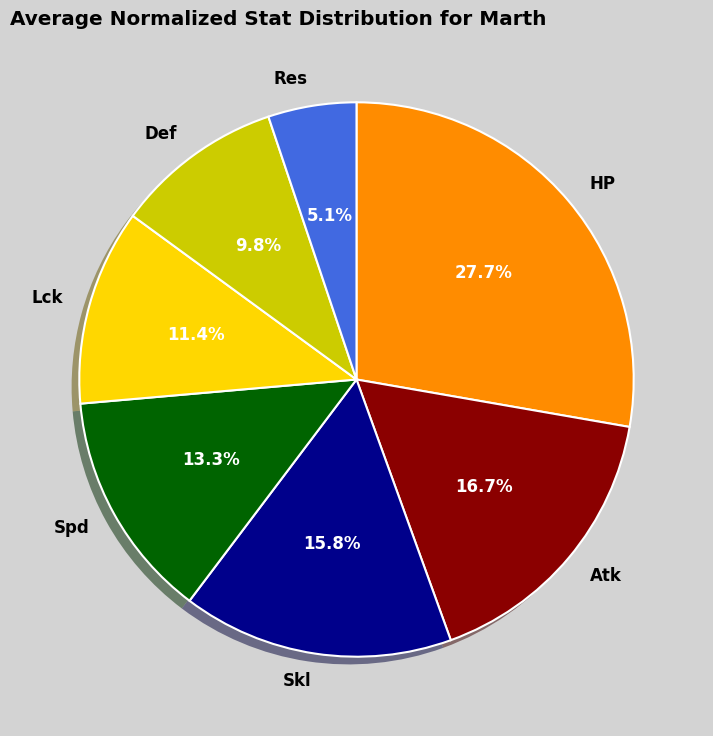

In [31]:
marth_stats_analysis.ave_stats, indices = torch.sort(marth_stats_analysis.ave_stats, descending=True)

marth_stats_analysis.plot_ave_stat_distribution()


- From the resulting pie chart, the following can be surmised about Marth's typical stat line
    - Ignoring HP, Atk, Skl and Spd seem to be emphsized the most in the stat line
    - Res tends to be his weakest stat
    - Def and Res don't have a share above 10% unlike most of his stats

- ***Game Appearence Comparison***

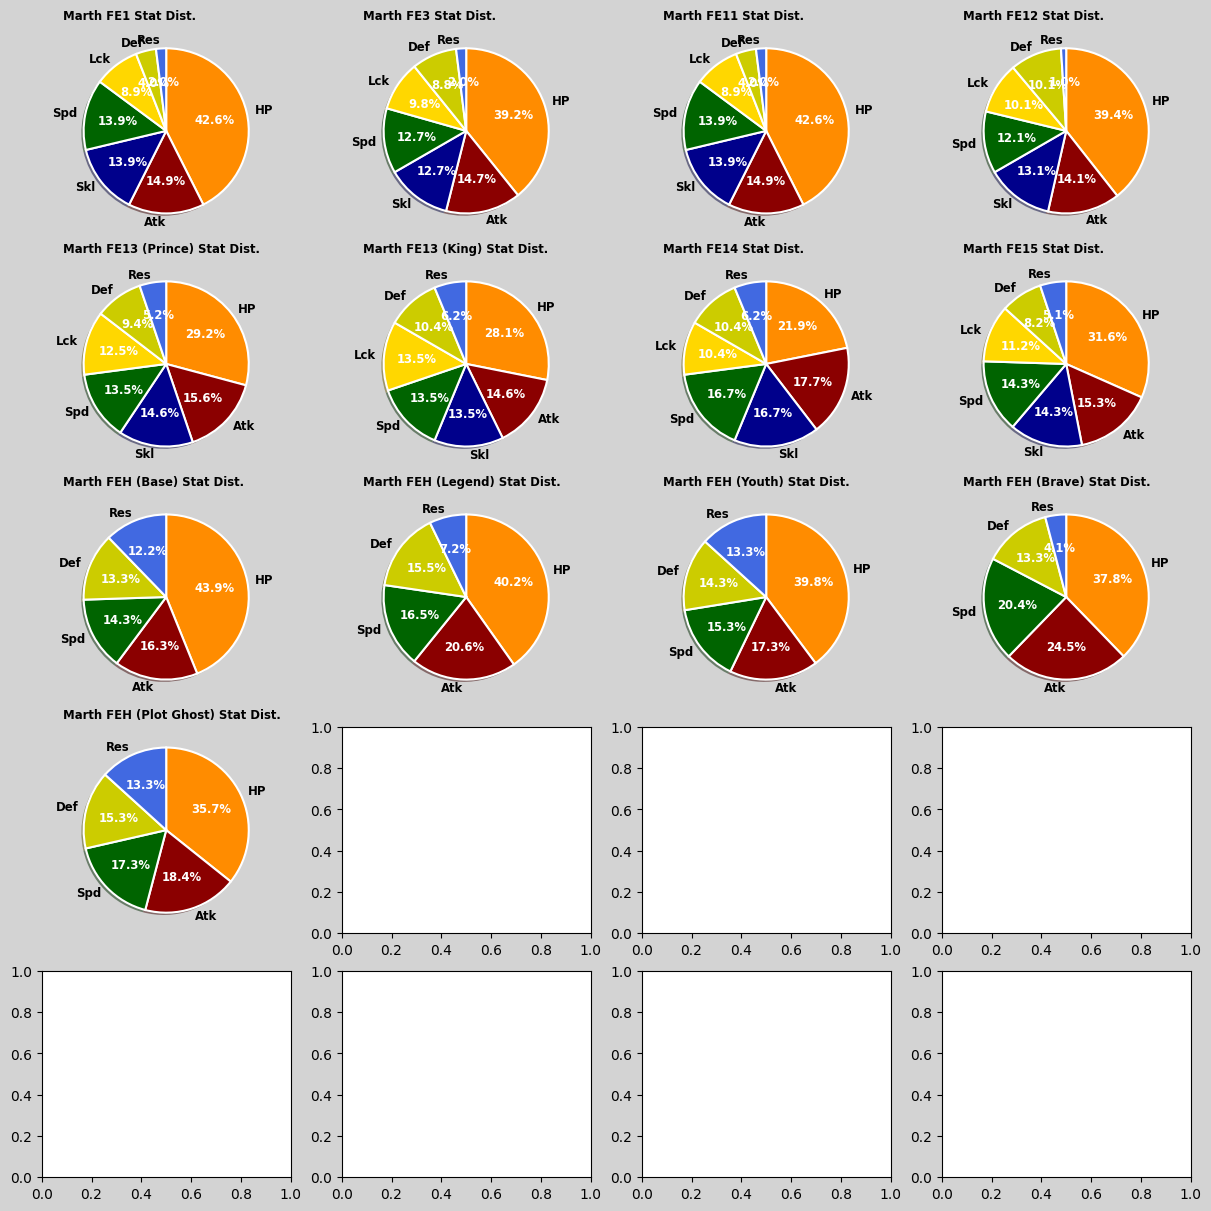

In [32]:
marth_stats_analysis.process_percentage_tensor()

marth_stats_analysis.plot_all_percentage_stat_lines()


- Across the board, it seems there aren't any outliers when factoring in ordering and how FEH doesn't include certain stats.
    - When looking into individual plots there are some interesting detials like how FE14 reduces HP to increase Atk, Skl, Spd and Def.

- ***Conclusions***

- Some text (I want to code first)